In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import fbprophet 
from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation
%matplotlib inline 

In [2]:
prediction_period = 20 

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/zalven/covid-19-prediction-2021/main/covid_prediction_data/philippines_covid_cases.csv')
df = df[['date','new_cases']]

In [4]:
df.tail()

,date,new_cases
494,2021-06-07,6526.0
495,2021-06-08,4769.0
496,2021-06-09,5444.0
497,2021-06-10,7470.0
498,2021-06-11,6662.0


<AxesSubplot:>

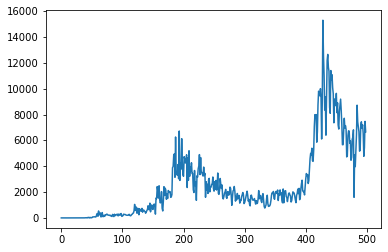

In [5]:
df['new_cases'].plot()

In [6]:
df.columns = ['ds','y']
df.tail()

,ds,y
494,2021-06-07,6526.0
495,2021-06-08,4769.0
496,2021-06-09,5444.0
497,2021-06-10,7470.0
498,2021-06-11,6662.0


In [7]:
df['ds'] = pd.to_datetime(df['ds'])

In [8]:
model = Prophet()

In [9]:
df.columns

Index(['ds', 'y'], dtype='object')

In [10]:
model.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [11]:
future_dates = model.make_future_dataframe(periods=prediction_period)
future_dates.tail()

,ds
514,2021-06-27
515,2021-06-28
516,2021-06-29
517,2021-06-30
518,2021-07-01


In [16]:
prediction = model.predict( future_dates)
prediction.tail(10)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
509,2021-06-22,8996.390004,6503.398160,10602.356486,8984.060515,9006.349788,-412.825246,-412.825246,-412.825246,-412.825246,-412.825246,-412.825246,0.0,0.0,0.0,8583.564757
510,2021-06-23,9039.118460,6639.222442,10792.142894,9024.756467,9052.157456,-395.144579,-395.144579,-395.144579,-395.144579,-395.144579,-395.144579,0.0,0.0,0.0,8643.973881
511,2021-06-24,9081.846917,6996.764734,11070.665332,9064.103238,9096.817074,-44.536255,-44.536255,-44.536255,-44.536255,-44.536255,-44.536255,0.0,0.0,0.0,9037.310662
512,2021-06-25,9124.575374,7531.953994,11594.493262,9104.520522,9141.384539,356.866547,356.866547,356.866547,356.866547,356.866547,356.866547,0.0,0.0,0.0,9481.441921
513,2021-06-26,9167.303831,7633.731742,11561.378671,9143.824374,9186.979258,336.892643,336.892643,336.892643,336.892643,336.892643,336.892643,0.0,0.0,0.0,9504.196473
514,2021-06-27,9210.032287,7235.370400,11388.818143,9182.113180,9232.535441,95.930347,95.930347,95.930347,95.930347,95.930347,95.930347,0.0,0.0,0.0,9305.962634
515,2021-06-28,9252.760744,7152.983081,11273.703314,9221.897104,9278.121841,62.816544,62.816544,62.816544,62.816544,62.816544,62.816544,0.0,0.0,0.0,9315.577289
516,2021-06-29,9295.489201,6991.217360,11017.120337,9260.775175,9324.747222,-412.825246,-412.825246,-412.825246,-412.825246,-412.825246,-412.825246,0.0,0.0,0.0,8882.663955
517,2021-06-30,9338.217658,6876.231614,10888.829607,9301.062915,9371.005115,-395.144579,-395.144579,-395.144579,-395.144579,-395.144579,-395.144579,0.0,0.0,0.0,8943.073078
518,2021-07-01,9380.946114,7320.112057,11295.823288,9340.302057,9416.407712,-44.536255,-44.536255,-44.536255,-44.536255,-44.536255,-44.536255,0.0,0.0,0.0,9336.409859


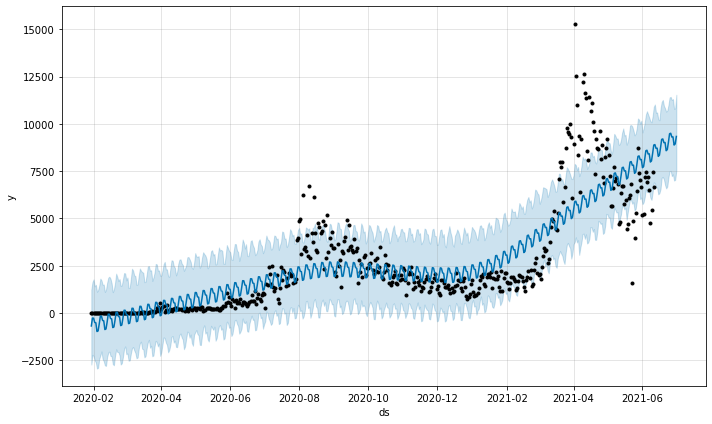

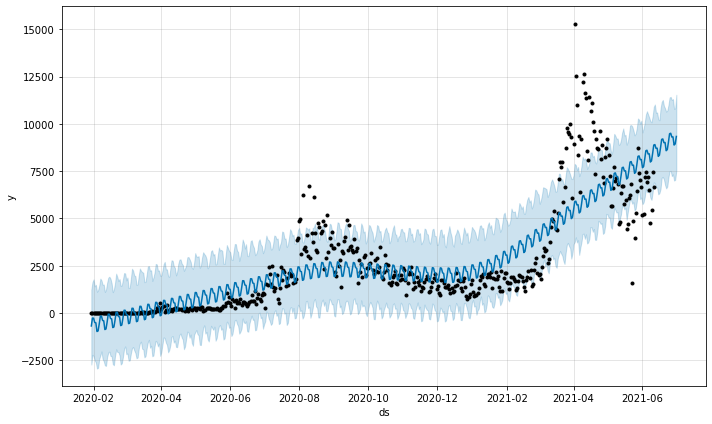

In [13]:
model.plot( prediction )

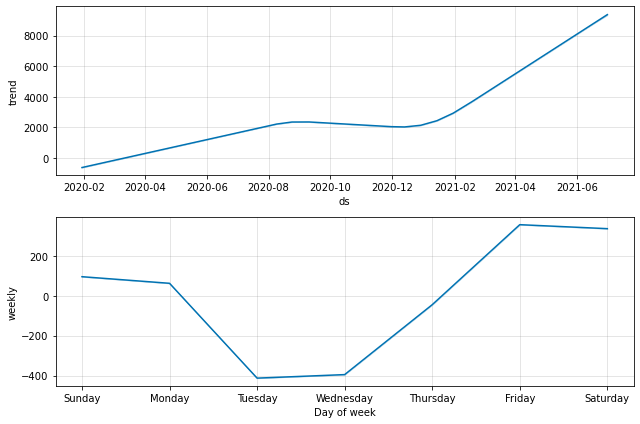

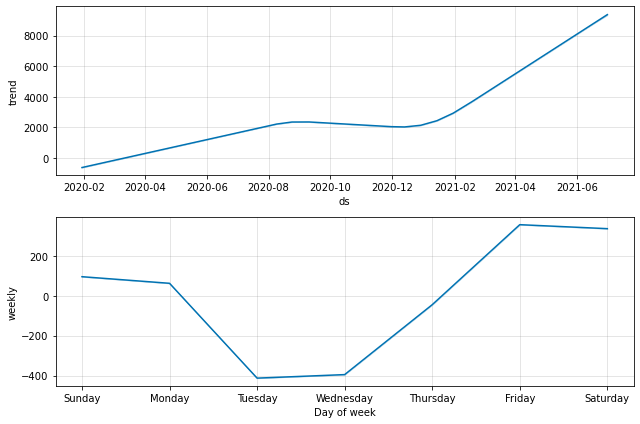

In [14]:
model.plot_components( prediction )

In [15]:
model2 = Prophet(daily_seasonality=False, weekly_seasonality=False, yearly_seasonality=False, 
                changepoint_range=1, changepoint_prior_scale = 0.7)
model2.add_seasonality(name='weekly', period=7, fourier_order=16, 
                      mode = 'multiplicative', prior_scale = 0.30)
model2.add_seasonality(name='triply', period=3, fourier_order=2, 
                      mode = 'multiplicative', prior_scale = 0.15)

print(f"Relative error (WAPE) for model = {prediction_accuracy(valid, model2)}%") 

NameError: name 'prediction_accuracy' is not defined

In [ ]:
def prediction_accuracy(valid, model):
    # Calculation prediction accuracy for valid dataset by model
    
    future = model.make_future_dataframe(periods = prediction_period)   # Valid data prediction
    forecast = model.predict(future)
    forecast = forecast[(len(forecast)-prediction_period):]
    forecast[forecast['yhat'] < 0]['yhat'] = 0
    y_val = forecast['yhat'].round()  # Prediction    
    y_target = valid['y']             # Real data
    
    return round(mean_absolute_error(y_val, y_target)*100/valid['y'].sum(), 2)   